In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report
from google.colab import files

In [ ]:
df = pd.read_excel("compiled.xlsx")
df.head()

,Tavg,RH_avg,RR,ss,plant_type
0,28.62,60.18,11.73,5.86,Ubi Kayu
1,24.99,60.64,11.63,6.32,Ubi Jalar
2,19.52,60.87,10.21,5.66,Ubi Kayu
3,19.28,61.72,10.92,6.09,Ubi Kayu
4,23.83,61.78,12.89,4.97,Ubi Kayu


In [ ]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values.reshape(-1, 1)

In [ ]:
y

array([['Ubi Kayu'],
       ['Ubi Jalar'],
       ['Ubi  Kayu'],
       ['Ubi  Kayu'],
       ['Ubi Kayu'],
       ['Ubi Kayu'],
       ['Ubi Kayu'],
       ['Ubi Jalar'],
       ['Ubi Kayu'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Ubi Kayu'],
       ['Ubi Kayu'],
       ['Ubi Jalar'],
       ['Ubi Kayu'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Kacang Tanah'],
       ['Ubi Jalar'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Ubi Jalar'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kacang Tanah'],
       ['Kedelai'],
       ['Kede

In [ ]:
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Membangun Model ANN
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
Total params: 288 (1.12 KB)
Trainable params: 288 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
33/33 [==============================] - 5s 34ms/step - loss: nan - accuracy: 0.1503 - val_loss: nan - val_accuracy: 0.2973
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.2423 - val_loss: nan - val_accuracy: 0.2973
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2423 - val_loss: nan - val_accuracy: 0.2973
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2423 - val_loss: nan - val_accuracy: 0.2973
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2423 - val_loss: nan - val_accuracy: 0.2973
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.2423 - val_loss: nan - val_accuracy: 0.2973
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.2423 - val_loss: nan - val_accuracy: 0.2973
Epoch 8/100
33/33 [==============================] - 0

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

2/2 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.2973
Test Accuracy: 29.73%


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        11
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2

    accuracy                           0.30        37
   macro avg       0.05      0.17      0.08        37
weighted avg       0.09      0.30      0.14        37



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_labels = encoder.inverse_transform(y_pred)
y_test_labels = encoder.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

ValueError: Found input variables with inconsistent numbers of samples: [296, 0]

<Axes: >

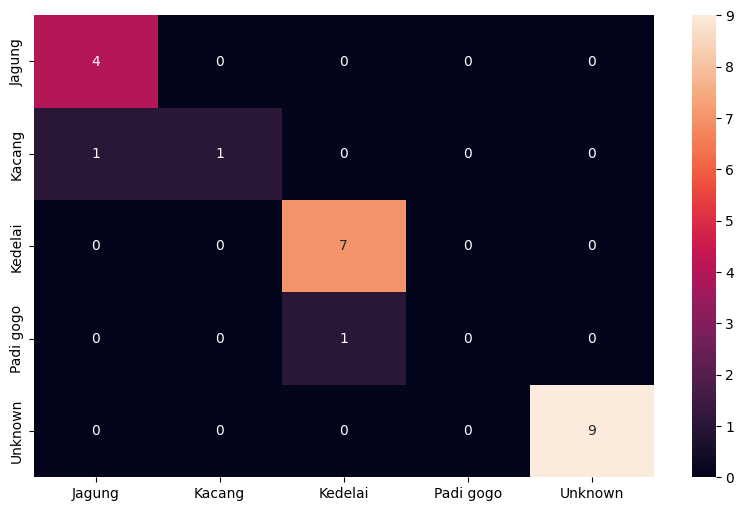

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])


In [ ]:
new_data = np.array([[27.0, 90, 40, 0.9, 3]])

In [ ]:
y_pred_new = model.predict(new_data)

1/1 [==============================] - 0s 55ms/step


In [ ]:
y_pred_label_new = encoder.inverse_transform(y_pred_new)

In [ ]:
print(f"Data baru diprediksi sebagai kelas: {y_pred_label_new[0][0]}")

Data baru diprediksi sebagai kelas: Unknown
